In [1]:
# lee el csv con todas las predicciones y obtiene métricas
import pandas as pd
import numpy as np

data = pd.read_csv("predictions.csv")
data['netmhcpan4.1_pred_SB'] = data.apply(lambda row: (  1 if row['ligand'] == "SB" else 0  ), axis=1)

print(data.head(3))

   id          HLA   peptide  Label  Length  \
0   1  HLA-A*01:01  LFGRDLSY      1       8   
1   2  HLA-A*01:01  TDKKTHLY      1       8   
2   3  HLA-A*01:01  RSDTPLIY      1       8   

                                  mhc  anthem_pred  anthem_prob  esm2t6_pred  \
0  YFAMYQENMAHTDANTLYIIYRDYTWVARVYRGY            0        0.819            1   
1  YFAMYQENMAHTDANTLYIIYRDYTWVARVYRGY            1        0.999            1   
2  YFAMYQENMAHTDANTLYIIYRDYTWVARVYRGY            1        0.999            1   

   esm2t6_prob  tape_pred  tape_prob  
0     0.974380          1   0.876145  
1     0.998730          1   0.997400  
2     0.999896          1   0.996318  


In [3]:
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)
from sklearn.metrics import roc_auc_score

def get_metrics(y_test, y_test_predictions):
    accuracy = accuracy_score(y_test, y_test_predictions)
    precision = precision_score(y_test, y_test_predictions)
    recall = recall_score(y_test, y_test_predictions)
    f1score = f1_score(y_test, y_test_predictions)
    auc = roc_auc_score(y_test, y_test_predictions)
    conf_matrix = confusion_matrix(y_test, y_test_predictions)

    return {    "accuracy":accuracy, 
                "precision":precision, 
                "recall":recall, 
                "f1score":f1score, 
                "auc":auc, 
                "conf_matrix":conf_matrix}


metrics_anthem = get_metrics(data["Label"], data["anthem_pred"])
#metrics_netmhcpan = get_metrics(data["Label"], data["netmhcpan4.1"])
metrics_tape = get_metrics(data["Label"], data["tape_pred"])
metrics_esm2t6 = get_metrics(data["Label"], data["esm2t6_pred"])
print(metrics_anthem)
#print(metrics_netmhcpan)
print(metrics_tape)
print(metrics_esm2t6)


{'accuracy': 0.8811044153436087, 'precision': 0.9786196932327316, 'recall': 0.7787248867727325, 'f1score': 0.8673034514424663, 'auc': 0.8808912973241482, 'conf_matrix': array([[85005,  1465],
       [19054, 67056]])}
{'accuracy': 0.9414822111484529, 'precision': 0.9352389459580169, 'recall': 0.9483915921495761, 'f1score': 0.9417693491936274, 'auc': 0.9414965940394, 'conf_matrix': array([[80815,  5655],
       [ 4444, 81666]])}
{'accuracy': 0.9401089349866728, 'precision': 0.9398305084745763, 'recall': 0.9401579375217745, 'f1score': 0.9399941944847605, 'auc': 0.9401090369926439, 'conf_matrix': array([[81287,  5183],
       [ 5153, 80957]])}


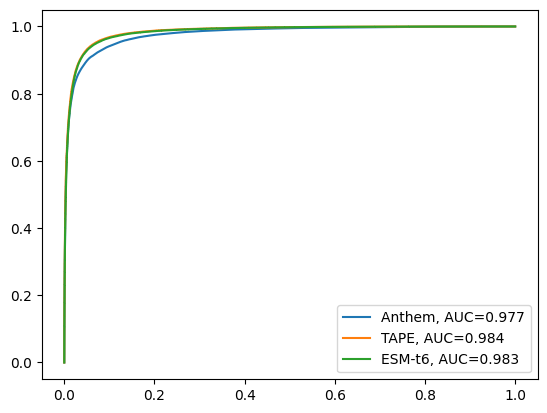

In [12]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

y_test = data["Label"]
anthem = data["anthem_prob"]
esm2t6 = data["esm2t6_prob"]
tape = data["tape_prob"]

fpr1, tpr1, _ = metrics.roc_curve(y_test,  anthem)
fpr2, tpr2, _ = metrics.roc_curve(y_test,  tape)
fpr3, tpr3, _ = metrics.roc_curve(y_test,  esm2t6)

auc1 = metrics.roc_auc_score(y_test, anthem)
auc2 = metrics.roc_auc_score(y_test, tape)
auc3 = metrics.roc_auc_score(y_test, esm2t6)

plt.plot(fpr1,tpr1,label="Anthem, AUC="+str(round(auc1,3)))
plt.plot(fpr2,tpr2,label="TAPE, AUC="+str(round(auc2,3)))
plt.plot(fpr3,tpr3,label="ESM-t6, AUC="+str(round(auc3,3)))

plt.legend(loc=4)
plt.show()